Compare the waveforms in 14 and 23

In [1]:
import bilby
import numpy as np
from astropy.constants import *
import sys
sys.path.append('../../../../../codes/')
from injection import calculate_signal
import matplotlib.pyplot as plt



In [4]:
flow = 5
srate = 4096
fref = 100
tc_offset = 1

index_file_line = 14

f = open('../../index.txt','r')
line = f.readlines()[index_file_line]
luminosity_distance = float(line.split()[17])
m1 = float(line.split()[1])
m2 = float(line.split()[3])
ra = float(line.split()[5])
dec = float(line.split()[7])
theta_jn = float(line.split()[9])
psi = float(line.split()[11])
phase = float(line.split()[13])
geocent_time = float(line.split()[15]) 


z = bilby.gw.conversion.luminosity_distance_to_redshift(luminosity_distance)

q = bilby.gw.conversion.component_masses_to_mass_ratio(m1, m2)
m, l = np.loadtxt('../../../../../codes/Mass_Vs_TidalDeformability_SLY.txt',dtype=float,unpack=True)  

mcz = bilby.gw.conversion.component_masses_to_chirp_mass(m1, m2) * (1+z)
l1 = np.interp(m1,m,l)
l2 = np.interp(m2,m,l)
lt = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_tilde(l1, l2, m1, m2)
dlt = bilby.gw.conversion.lambda_1_lambda_2_to_delta_lambda_tilde(l1, l2, m1, m2)

Interferometers = ['CE']

injection_parameters = dict(
    chirp_mass=mcz, mass_ratio=q, chi_1=0., chi_2=0., lambda_tilde = lt, delta_lambda_tilde = dlt,
    ra=ra, dec=dec, luminosity_distance = luminosity_distance,
    theta_jn=theta_jn, psi=psi, phase=phase, geocent_time=geocent_time
)

t0 = -(5.0 / 256.0) * mcz * GM_sun.value / c.value**3 * (np.pi * mcz * GM_sun.value / c.value**3 * flow)**(-8.0/3.0)

seglen = 2**(np.int(np.log2(np.abs(t0)))+1)

start_time = injection_parameters["geocent_time"] - seglen + tc_offset
waveformname = "TaylorF2"

# costruct ifos
ifos = bilby.gw.detector.InterferometerList(Interferometers)
waveform_generator = bilby.gw.WaveformGenerator(
    duration=seglen, sampling_frequency=srate,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=dict(waveform_approximant=waveformname, reference_frequency=fref, minimum_frequency=flow)
)

# print out snr
snr = 0.
for ifo in ifos:
    frequency_array, frequency_domain_strain_all_on = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=True,
        earth_rotation_beam_patterns=True,
        finite_size = True
    )
    frequency_array, frequency_domain_strain_ertd_on = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=True,
        earth_rotation_beam_patterns= False,
        finite_size = False
    )
    frequency_array, frequency_domain_strain_erbp_on = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=False,
        earth_rotation_beam_patterns= True,
        finite_size = False
    )
    frequency_array, frequency_domain_strain_fs_on = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=False,
        earth_rotation_beam_patterns= False,
        finite_size = True
    )
    frequency_array, frequency_domain_strain_all_off = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=False,
        earth_rotation_beam_patterns=False,
        finite_size = False
    )
    


/tmp/ipykernel_3998814/1992067492.py:42: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  seglen = 2**(np.int(np.log2(np.abs(t0)))+1)
15:03 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters


In [5]:
index_file_line = 27

f = open('../../index.txt','r')
line = f.readlines()[index_file_line]
luminosity_distance = float(line.split()[17])
m1 = float(line.split()[1])
m2 = float(line.split()[3])
ra = float(line.split()[5])
dec = float(line.split()[7])
theta_jn = float(line.split()[9])
psi = float(line.split()[11])
phase = float(line.split()[13])
geocent_time = float(line.split()[15]) 


z = bilby.gw.conversion.luminosity_distance_to_redshift(luminosity_distance)

q = bilby.gw.conversion.component_masses_to_mass_ratio(m1, m2)
m, l = np.loadtxt('../../../../../codes/Mass_Vs_TidalDeformability_SLY.txt',dtype=float,unpack=True)  

mcz = bilby.gw.conversion.component_masses_to_chirp_mass(m1, m2) * (1+z)
l1 = np.interp(m1,m,l)
l2 = np.interp(m2,m,l)
lt = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_tilde(l1, l2, m1, m2)
dlt = bilby.gw.conversion.lambda_1_lambda_2_to_delta_lambda_tilde(l1, l2, m1, m2)

Interferometers = ['CE']

injection_parameters = dict(
    chirp_mass=mcz, mass_ratio=q, chi_1=0., chi_2=0., lambda_tilde = lt, delta_lambda_tilde = dlt,
    ra=ra, dec=dec, luminosity_distance = luminosity_distance,
    theta_jn=theta_jn, psi=psi, phase=phase, geocent_time=geocent_time
)

t0 = -(5.0 / 256.0) * mcz * GM_sun.value / c.value**3 * (np.pi * mcz * GM_sun.value / c.value**3 * flow)**(-8.0/3.0)

seglen = 2**(np.int(np.log2(np.abs(t0)))+1)

start_time = injection_parameters["geocent_time"] - seglen + tc_offset
waveformname = "TaylorF2"

# costruct ifos
ifos = bilby.gw.detector.InterferometerList(Interferometers)
waveform_generator = bilby.gw.WaveformGenerator(
    duration=seglen, sampling_frequency=srate,
    frequency_domain_source_model=bilby.gw.source.lal_binary_neutron_star,
    parameter_conversion=bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters,
    waveform_arguments=dict(waveform_approximant=waveformname, reference_frequency=fref, minimum_frequency=flow)
)

# print out snr
snr = 0.
for ifo in ifos:
    frequency_array1, frequency_domain_strain_all_on1 = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=True,
        earth_rotation_beam_patterns=True,
        finite_size = True
    )
    frequency_array1, frequency_domain_strain_ertd_on1 = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=True,
        earth_rotation_beam_patterns= False,
        finite_size = False
    )
    frequency_array1, frequency_domain_strain_erbp_on1 = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=False,
        earth_rotation_beam_patterns= True,
        finite_size = False
    )
    frequency_array1, frequency_domain_strain_fs_on1 = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=False,
        earth_rotation_beam_patterns= False,
        finite_size = True
    )
    frequency_array1, frequency_domain_strain_all_off1 = calculate_signal(
        ifo, waveform_generator, injection_parameters, start_time, flow,
        earth_rotation_time_delay=False,
        earth_rotation_beam_patterns=False,
        finite_size = False
    )
    

/tmp/ipykernel_3998814/3394347976.py:37: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  seglen = 2**(np.int(np.log2(np.abs(t0)))+1)
15:04 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_neutron_star
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_neutron_star_parameters


/tmp/ipykernel_3998814/4048090901.py:39: RuntimeWarning: invalid value encountered in divide
  ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_all_on1/frequency_domain_strain_all_off1),'-k',linewidth=4)
/tmp/ipykernel_3998814/4048090901.py:40: RuntimeWarning: invalid value encountered in divide
  ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_erbp_on1/frequency_domain_strain_all_off1),label = 'rot amp mod on - all off',linestyle = '--',linewidth=4)
/tmp/ipykernel_3998814/4048090901.py:41: RuntimeWarning: invalid value encountered in divide
  ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_fs_on1/frequency_domain_strain_all_off1),label = 'size  on - all off',linestyle = '-.',linewidth=4)
/tmp/ipykernel_3998814/4048090901.py:42: RuntimeWarning: invalid value encountered in divide
  ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_ertd_on1/frequency_domain_strain_all_off1),label = 'rot phase mod on - all off',linestyle = ':',

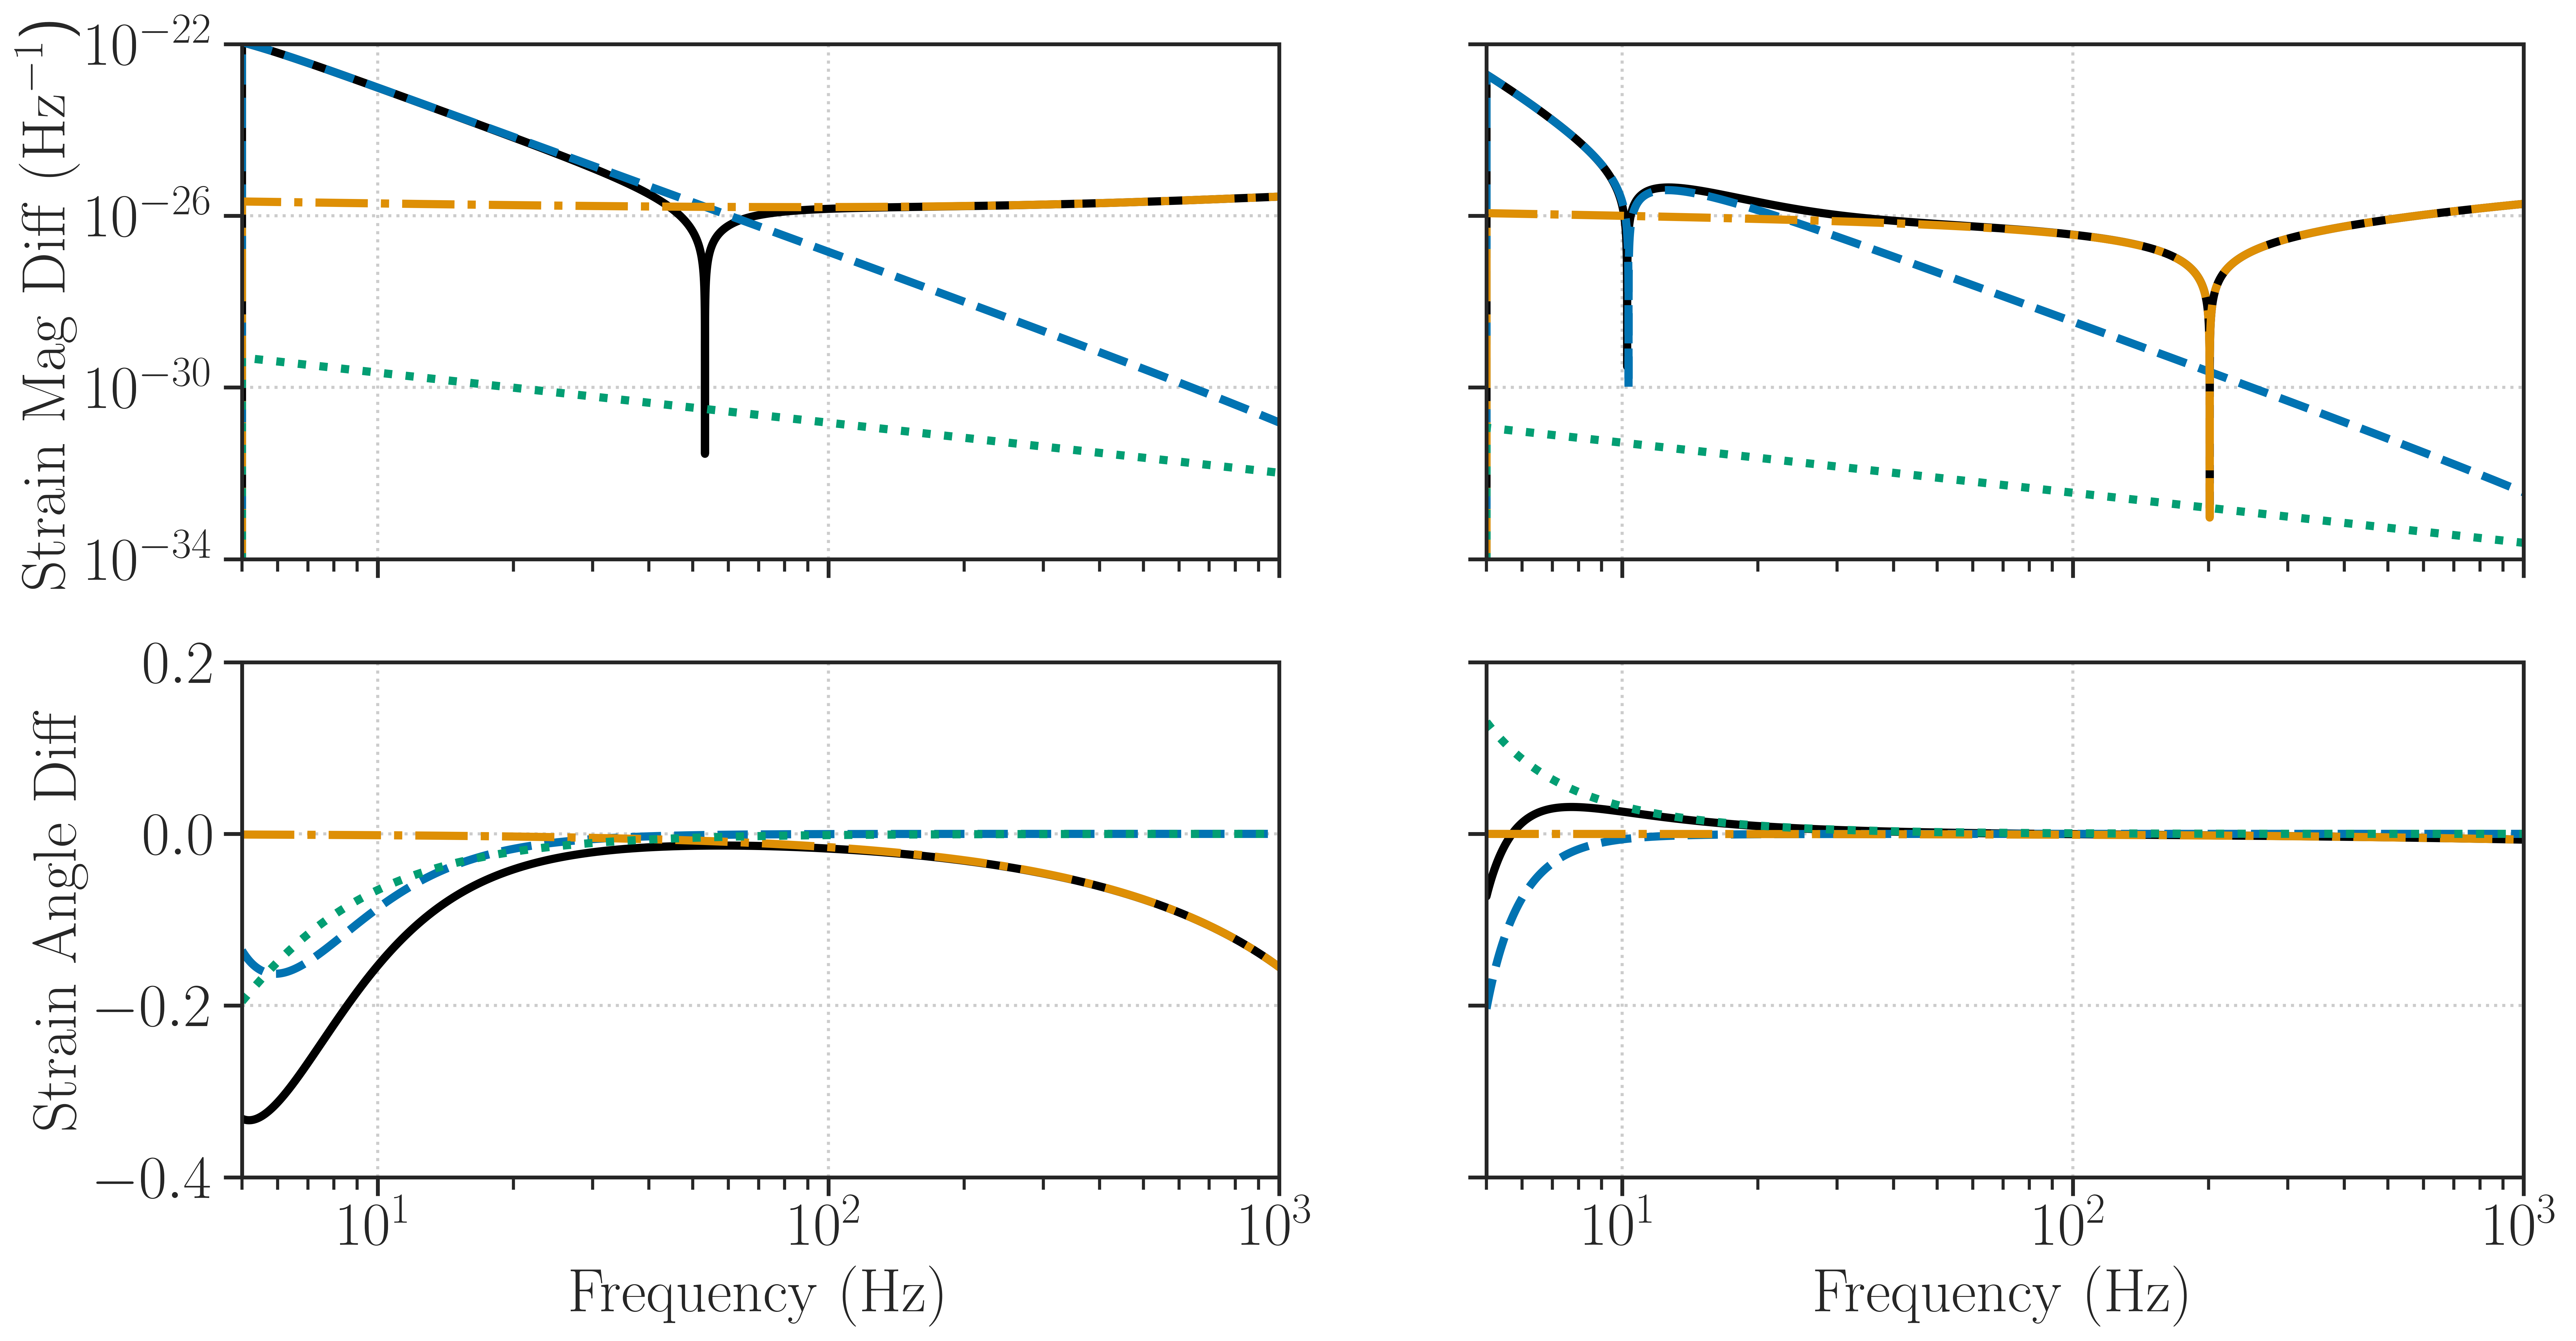

In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.sans-serif'] = ['Bitstream Vera Sans']
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('colorblind')
colors=sns.color_palette('colorblind')


# matplotlib.rc('xtick', labelsize=16) 
# matplotlib.rc('ytick', labelsize=16) 
# matplotlib.rcParams['lines.linewidth'] = 3
# matplotlib.rcParams["figure.autolayout"] = True
# matplotlib.rcParams.update({"axes.grid" : True, "grid.color": "grey"})

nbins = 15
fs = 30
ls = 30

fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(2, 2,figsize = [20,10],dpi = 500)
ax1.loglog(frequency_array1, np.abs(np.abs(frequency_domain_strain_all_on1) - np.abs(frequency_domain_strain_all_off1)),'-k',linewidth=4)
ax1.loglog(frequency_array1, np.abs(np.abs(frequency_domain_strain_erbp_on1) - np.abs(frequency_domain_strain_all_off1)),label = 'rot amp mod on - all off',linestyle = '--',linewidth=4)
ax1.loglog(frequency_array1, np.abs(np.abs(frequency_domain_strain_fs_on1) - np.abs(frequency_domain_strain_all_off1)),label = 'size  on - all off',linestyle = '-.',linewidth=4)
ax1.loglog(frequency_array1, np.abs(np.abs(frequency_domain_strain_ertd_on1) - np.abs(frequency_domain_strain_all_off1)),label = 'rot phase mod on - all off',linestyle = ':',linewidth=4)
ax1.set_xlim((flow,1000))
ax1.set_ylim(10**-34,10**-22)
ax1.set_ylabel(r"$\rm Strain~ Mag ~Diff~ (Hz^{-1}$)", fontsize = fs)
ax1.set_xticklabels([])
ax1.grid('minor',linestyle='dotted')
ax1.tick_params(axis='both', labelsize=ls)


ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_all_on1/frequency_domain_strain_all_off1),'-k',linewidth=4)
ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_erbp_on1/frequency_domain_strain_all_off1),label = 'rot amp mod on - all off',linestyle = '--',linewidth=4)
ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_fs_on1/frequency_domain_strain_all_off1),label = 'size  on - all off',linestyle = '-.',linewidth=4)
ax2.semilogx(frequency_array1, np.angle(frequency_domain_strain_ertd_on1/frequency_domain_strain_all_off1),label = 'rot phase mod on - all off',linestyle = ':',linewidth=4)
ax2.set_xlim((flow,1000))
ax2.set_ylim(-0.4,0.2)
ax2.set_ylabel(r"$\rm Strain ~Angle~ Diff$", fontsize = fs)
ax2.set_xlabel(r'$\rm Frequency ~ (Hz)$', fontsize = fs)
ax2.grid('minor',linestyle='dotted')
ax2.tick_params(axis='both', labelsize=ls)


ax3.loglog(frequency_array, np.abs(np.abs(frequency_domain_strain_all_on) - np.abs(frequency_domain_strain_all_off)),'-k',linewidth=4)
ax3.loglog(frequency_array, np.abs(np.abs(frequency_domain_strain_erbp_on) - np.abs(frequency_domain_strain_all_off)),label = 'rot amp mod on - all off',linestyle = '--',linewidth=4)
ax3.loglog(frequency_array, np.abs(np.abs(frequency_domain_strain_fs_on) - np.abs(frequency_domain_strain_all_off)),label = 'size  on - all off',linestyle = '-.',linewidth=4)
ax3.loglog(frequency_array, np.abs(np.abs(frequency_domain_strain_ertd_on) - np.abs(frequency_domain_strain_all_off)),label = 'rot phase mod on - all off',linestyle = ':',linewidth=4)
ax3.set_xlim((flow,1000))
ax3.set_ylim(10**-34,10**-22)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.grid('minor',linestyle='dotted')
ax3.tick_params(axis='both', labelsize=ls)


ax4.semilogx(frequency_array, np.angle(frequency_domain_strain_all_on/frequency_domain_strain_all_off),'-k',linewidth=4)
ax4.semilogx(frequency_array, np.angle(frequency_domain_strain_erbp_on/frequency_domain_strain_all_off),label = 'rot amp mod on - all off',linestyle = '--',linewidth=4)
ax4.semilogx(frequency_array, np.angle(frequency_domain_strain_fs_on/frequency_domain_strain_all_off),label = 'size  on - all off',linestyle = '-.',linewidth=4)
ax4.semilogx(frequency_array, np.angle(frequency_domain_strain_ertd_on/frequency_domain_strain_all_off),label = 'rot phase mod on - all off',linestyle = ':',linewidth=4)
ax4.set_xlim((flow,1000))
ax4.set_ylim(-0.4,0.2)
ax4.set_xlabel(r'$\rm Frequency ~ (Hz)$', fontsize = fs)
ax4.grid('minor',linestyle='dotted')
ax4.set_yticklabels([])
ax4.tick_params(axis='both', labelsize=ls)

plt.savefig('1427.pdf',bbox_inches='tight')

Code to calculate the overlap between the waveforms

In [7]:
import numpy as np
def overlap(h1, h2, f, psd):
    tmp = []
    for t in np.arange(-0.1, 0.1, 0.01):
        #print(t, (np.conjugate(h1)*h2(np.exp(2*np.pi*1j*f*t))/psd, f))
        tmp.append(np.abs(4*np.trapz(np.conjugate(h1)*h2*(np.exp(2*np.pi*1j*f*t))/psd, f)))

    return np.max(tmp)

In [30]:
f, p =np.loadtxt('ce_psd.txt', unpack = True)
psd = np.interp(frequency_array,f,p)

In [31]:
overlap(frequency_domain_strain_all_on, frequency_domain_strain_all_off, frequency_array, psd)

996988.3839949305

In [32]:
overlap(frequency_domain_strain_all_on1, frequency_domain_strain_all_off1, frequency_array, psd)

953975.8903654679